Process subscription data to deterine which users are most likely be churned.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
    

In [49]:
df1=pd.read_csv('churn_data.csv')  # users who were 60 days enrolled, churn in the next 30

In [50]:
# Check the data
#df2 = df1.drop(columns=['user','churn'])
# plt.suptitle('Histograms of Numberical Columns', fontsize=20)
#df2.info()
df1.isna().any()
df1.isna().sum()
df1[:3].head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0


In [51]:

df1=df1[pd.notnull(df1['age'])]     # Will get only Age not null.  
df1=df1.drop(columns = ['credit_score', 'rewards_earned'])  # drop two columns becuase of high null occurence
df2 = df1.drop(columns=['user','churn'])

In [52]:
df2.iloc[:,1].head()

0    na
1     R
2     R
3     R
4    na
Name: housing, dtype: object

i= 1
vals= 73
i= 2
vals= 3


KeyboardInterrupt: 

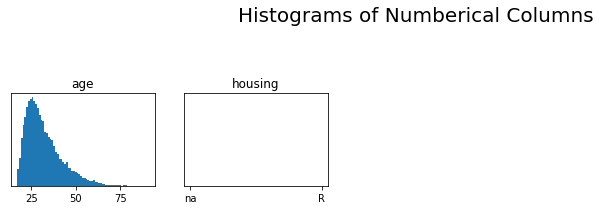

In [54]:
# histograms

df2 = df1.drop(columns=['user','churn'])

fig=plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numberical Columns', fontsize=20)

for i in range(1, df2.shape[1]+1):
    print("i=",i)
    plt.subplot(6, 5, i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i-1])
    vals=np.size(df2.iloc[:,i-1].unique())
    print("vals=",vals)
    plt.hist(df2.iloc[:, i - 1], bins=vals, histtype='bar')
    # plt.hist(df2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
## ====>  The above histogram does not work   <====

In [132]:
df2=df1[['housing', 'is_referred','app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month',
       'is_referred']]

fig=plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distribution', fontsize=20)

for i in range(1, df2.shape[1]+1):
 #   print("i=",i)
    plt.subplot(6, 3, i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i-1])
    values = df2.iloc[:,i-1].value_counts(normalize=True).values
    index  = df2.iloc[:,i-1].value_counts(normalize=True).index
  
 #   print("values=",values)
 #   print("index=", index)
    
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
    

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
## ====>  The above histogram does not work   <====

KeyError: "['app_web_user'] not in index"

In [105]:
print(df1[df2.waiting_4_loan==1]['churn'].value_counts())
print(df1[df2.cancelled_loan==1].churn.value_counts())
print(df1[df2.rejected_loan==1].churn.value_counts())

0    27
1     8
Name: churn, dtype: int64
1    274
0    234
Name: churn, dtype: int64
1    107
0     25
Name: churn, dtype: int64


---
Exploring Uneven Features

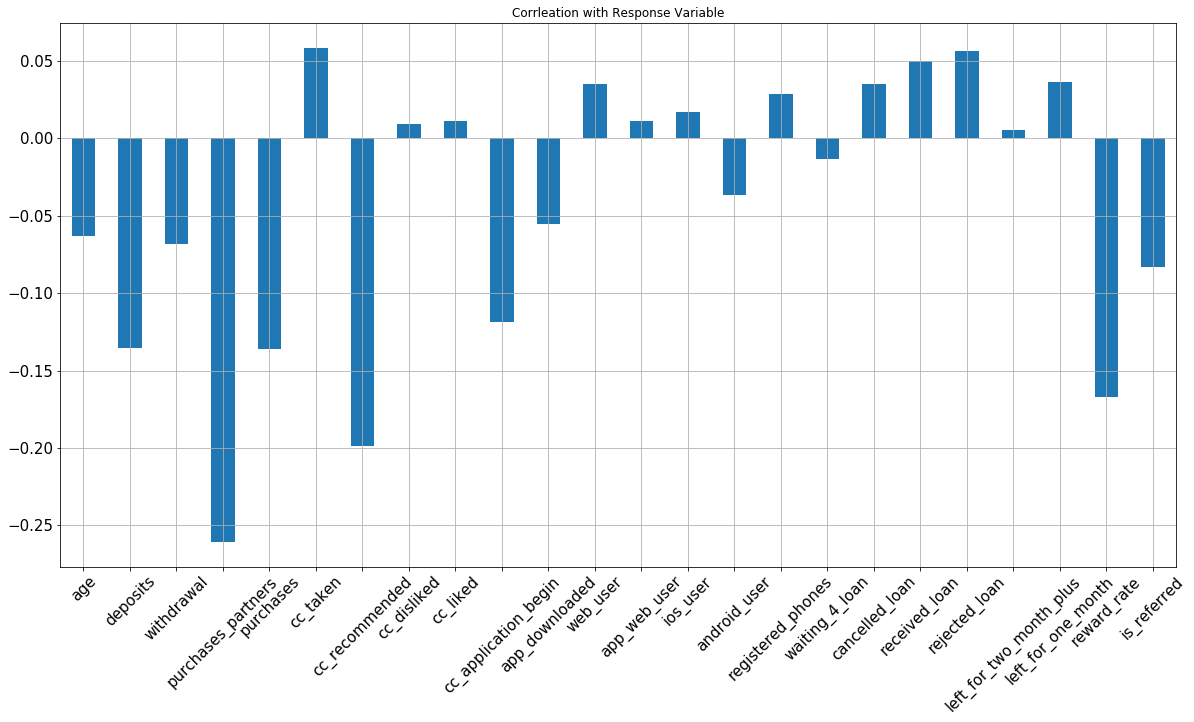

In [118]:
#df1.drop(columns = ['churn','user', 'housing','payment_type', 'zodiac_sign']).head()
#df1.drop(columns = ['churn','user', 'housing','payment_type', 'zodiac_sign']).corrwith(df1.churn)
df1.drop(columns = ['churn','user', 'housing','payment_type', 'zodiac_sign']).corrwith(df1.churn).plot.bar(
    figsize=(20,10), title="Corrleation with Response Variable", fontsize=15, rot=45,
    grid=True)

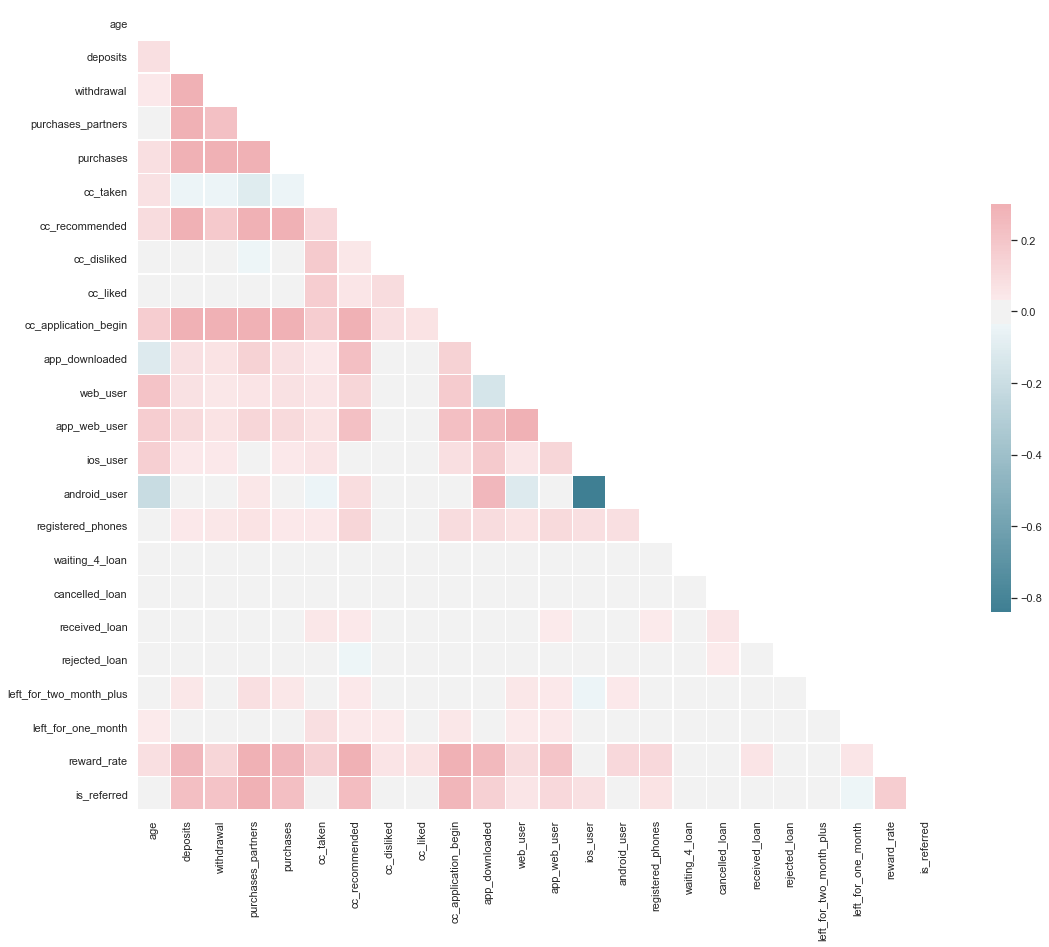

In [128]:
# Correlation Matrix
sn.set(style='white')

#Compute the correlation matrix
corr=df1.drop(columns=['churn','user']).corr()

# Generate a mask for the upper triangle
mask= np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure
f, ax=plt.subplots(figsize=(18,15))

# Generate a customer diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [131]:
#df1=df1.drop(columns = ['app_web_user'])
df1.to_csv('new_churn_data.csv', index=False)

---
To create AI model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random

df1=pd.read_csv('new_churn_data.csv')


In [2]:
## Data Preparation
user_identifier=df1['user']
df1=df1.drop(columns='user')

In [267]:
# One Hot Encoding
df1=pd.get_dummies(df1)
df1=df1.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [268]:
#Spliting data to X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['churn']), 
                                                    df1['churn'],
                                                    test_size = 0.2,
                                                    random_state=0)

In [271]:

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

(21596, 41)
(21596,)
(5400, 41)
(5400,)
0    12656
1     8940
Name: churn, dtype: int64
0    3166
1    2234
Name: churn, dtype: int64


In [273]:
## Balancing the training set
## Since there are more Negative 0 => 12656 than positive 1 => 8940 
## Need a more balance +/- eg same number of positive and negative 
pos_index = y_train[y_train.values==1].index # get the index of all positive value
neg_index = y_train[y_train.values==0].index # get the index of all positive value

if len(pos_index) > len(neg_index):  # determine which has more entries
    higher = pos_index
    lower  = neg_index
else:
    higher = neg_index
    lower  = pos_index

random.seed(0)

# This will generate random number of entries
higher = np.random.choice(higher, size=len(lower))  
lower  = np.asarray(lower)        # to make lower the same array as higher
new_indexes = np.concatenate((higher,lower))

X_train = X_train.loc[new_indexes,]
y_train = y_train.loc[new_indexes,]

In [287]:
print(X_train.shape)

print(y_train.shape)


(17880, 41)
(17880,)


In [298]:
## Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2  = pd.DataFrame(sc_X.fit_transform(X_test))
## Add columns for train2 and test2
X_train2.columns = X_train.columns.values
X_test2.columns  = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test  = X_test2

--- 
Model Fitting


In [319]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)  # create a logistic Regression Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [321]:
print('cm=',cm) 
print('accuracy score=', accuracy)
print('f1 score=', f1)
print('precision score=', precision)
print('recall score=', recall)

cm= [[1584 1582]
 [ 544 1690]]
accuracy score= 0.6062962962962963
f1 score= 0.6138757718852161
precision score= 0.5165036674816625
recall score= 0.756490599820949


---

Test Data Accuracy: 0.6063


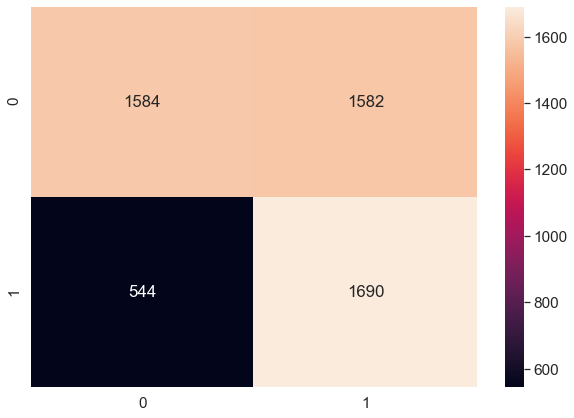

In [322]:
## create a heatmap 
df_cm=pd.DataFrame(cm, index=(0,1), columns =(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f"% accuracy_score(y_test,y_pred))

In [323]:
# cross validation 
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(),accuracies.std() * 2))

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

Logistic Accuracy: 0.644 (+/- 0.016)


In [335]:
# Analyzing Coefficients  = theta in the linear equation function?
# higher coef values meaning more weight on the overall evaluation of the result.
# eg purchases and purchases_partners


pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
           axis = 1)

,features,coef
0,age,-0.141409
1,deposits,0.381647
2,withdrawal,0.055261
3,purchases_partners,-0.756621
4,purchases,-0.514811
5,cc_taken,0.071508
6,cc_recommended,0.073258
7,cc_disliked,-0.016497
8,cc_liked,-0.002635
9,cc_application_begin,0.015393


In [360]:
## features Selection

from sklearn.feature_selection import RFE     # What is RFE?
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()  # Create a new classifier?
rfe = RFE(classifier, 20)          # Will use 20 columns
rfe = rfe.fit(X_train, y_train)



/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [361]:

pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(rfe.support_), columns=['support'])],
           axis = 1)
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_one_month', 'reward_rate',
       'housing_O', 'housing_R', 'payment_type_Semi-Monthly',
       'payment_type_Weekly'],
      dtype='object')

---
Refit the model with only important columns.  This will speed up the fitting. 
Copy from the previous codes and change the train and test data.

In [369]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)  # create a logistic Regression Model
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)               # fit the model with train data


y_pred=classifier.predict(X_test[X_train.columns[rfe.support_]])              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [365]:
print('cm=',cm) 
print('accuracy score=', accuracy)
print('f1 score=', f1)
print('precision score=', precision)
print('recall score=', recall)

cm= [[1580 1586]
 [ 539 1695]]
accuracy score= 0.6064814814814815
f1 score= 0.614687216681777
precision score= 0.5166107893934776
recall score= 0.7587287376902417


Test Data Accuracy: 0.6065


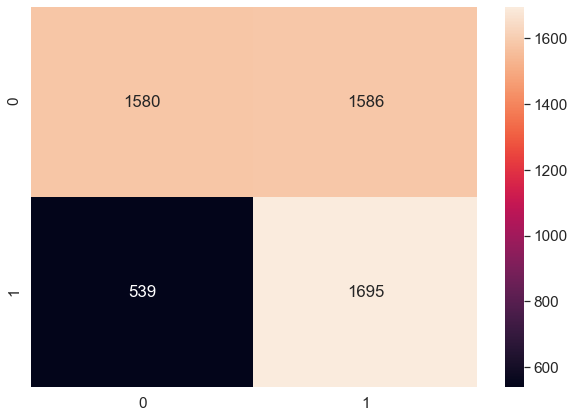

In [366]:
## create a heatmap 
df_cm=pd.DataFrame(cm, index=(0,1), columns =(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f"% accuracy_score(y_test,y_pred))

The above results are not much different from the previous results when all columns are used. 


In [370]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
           axis = 1)
#X_train.columns[rfe.support_]

,features,coef
0,age,-0.139863
1,deposits,0.371753
2,withdrawal,0.059561
3,purchases_partners,-0.742655
4,purchases,-0.500335
5,cc_taken,0.070737
6,cc_recommended,0.085085
7,web_user,0.118184
8,ios_user,0.060192
9,registered_phones,0.108659


In [383]:
final_results = pd.concat([y_test, user_identifier], axis =1).dropna()
final_results['predicted_churn'] = y_pred   # create a new column to keep predicted churn
final_results=final_results[['user', 'churn', 'predicted_churn']].reset_index()

In [384]:
final_results.head(20)

,index,user,churn,predicted_churn
0,4,61353,1.0,1
1,7,67679,0.0,0
2,8,21269,0.0,0
3,18,69531,0.0,1
4,22,25997,0.0,0
5,31,28827,0.0,0
6,36,58305,1.0,0
7,45,2351,0.0,1
8,48,11790,0.0,1
9,64,46727,0.0,1


In [376]:
print("rfe=", rfe.support_)
#print("rfe=", rfe.ranking_)
#print("classifier.coef=", classifier.coef_)
#print("accuracies=",accuracies)
#print("accuracies.mean()=",accuracies.mean())
#print(X_train.head())
#print(X_train.shape)
#print(X_train2.head())
#print(X_train2.index)
#print(X_train2.columns)
#print(X_train.index)
#print(X_train.columns)
print("y_test =",y_test.shape)
#print("X_test.index =",X_test.index)
#print("X_test.columns =",X_test.columns)
#print("X_test2.index =",X_test2.index)
#print("X_test2.columns =",X_test2.columns)

rfe= [ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True False  True  True False  True
  True False False  True  True False False False False False False False
 False False False False False]
y_test = (5400,)
